In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\NPStudent\Downloads\08-Linear-Regression-Models\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
# with sales being the label we want to predict in our model, 
# we want to explore each variables' r/s with the sales through scatterplot

<AxesSubplot:xlabel='TV', ylabel='sales'>

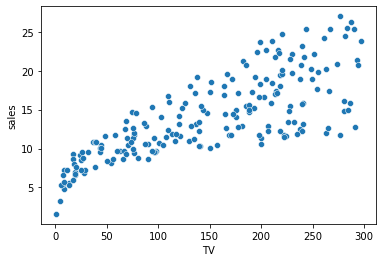

In [5]:
sns.scatterplot(data=df, x='TV', y='sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

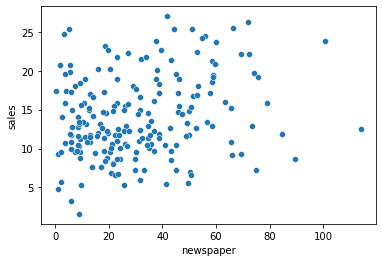

In [6]:
sns.scatterplot(data=df, x='newspaper', y='sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

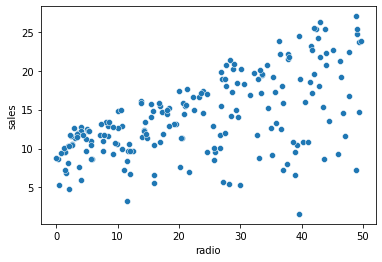

In [7]:
sns.scatterplot(data=df, x='radio', y='sales')

In [8]:
# after evaluating the scatterplot, we want to evaluate the corr through the numbers
# tv has a fairly strong positive corr with sales
# radio has a moderate positive corr with sales
# newspaper has a weak positive corr with sales

# in addition, we can also conclude that our data set do not require feature scaling
# as all the variables are in the same unit

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [10]:
# use the sklearn library to split the data set into training and test set

from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('sales', axis=1), df['sales'], test_size=0.3, random_state=101)

In [12]:
# before diving into polynomial features, we can employ linear regression model to study if the data are linear or non-linear
# this can be done by evaluating the residual plot
# as polynomial feature is almost always helpful for a model, we can employ a for loop to find the optimal degree of freedom
# we will evaluate the error metrics for each degree of freedom

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

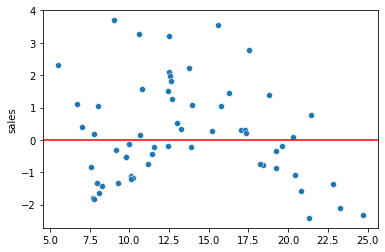

In [13]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)
y_hat = simple_model.predict(X_test)
residual = y_hat - y_test

sns.scatterplot(x=y_hat, y=residual)
plt.axhline(y=0, color='red')

In [14]:
# the result above has shown that the data set is linear as there is no obvious patterns in the residuals

In [15]:
# splitting the test_RMSE and train_RMSE to look out for overfitting patterns 
# higher polynomial degree will result in overfitting models, which lead to low RMSE

test_RMSE = []
train_RMSE = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_x_train = poly_converter.fit_transform(X_train)
    poly_x_test = poly_converter.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(poly_x_train, y_train)
    
    train_pred_y = model.predict(poly_x_train) 
    test_pred_y = model.predict(poly_x_test)
    
    RMSE_for_train_set = np.sqrt(mean_squared_error(y_train, train_pred_y))
    train_RMSE.append(RMSE_for_train_set)
    
    RMSE_for_test_set = np.sqrt(mean_squared_error(y_test, test_pred_y))
    test_RMSE.append(RMSE_for_test_set)

Text(0, 0.5, 'Test RMSE')

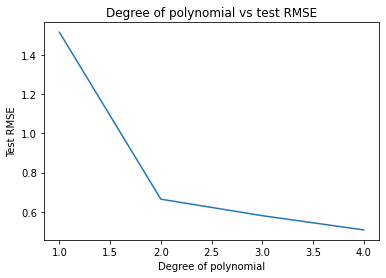

In [16]:
plt.plot(range(1,5), test_RMSE[0:4])
plt.title('Degree of polynomial vs test RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('Test RMSE')

In [17]:
test_RMSE

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231453,
 0.5077742623872589,
 2.5758247707699113,
 4.492670773896812,
 1381.4040685804796,
 4449.568027403435,
 95893.02658330933]

Text(0, 0.5, 'Train RMSE')

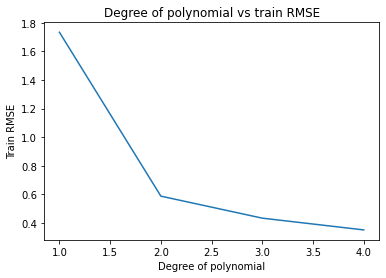

In [21]:
plt.plot(range(1,5), train_RMSE[0:4])
plt.title('Degree of polynomial vs train RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('Train RMSE')

In [19]:
train_RMSE

[1.734594124329376,
 0.5879574085292233,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990972,
 0.1971254009841768,
 5.421422348088463,
 0.1426544837726474,
 0.16675345956185658]

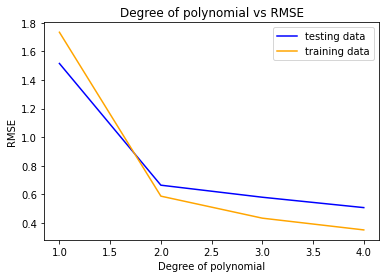

In [24]:
plt.plot(range(1,5), test_RMSE[0:4], color='blue', label='testing data')
plt.plot(range(1,5), train_RMSE[0:4], color='orange', label='training data')
plt.title('Degree of polynomial vs RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.legend()

In [20]:
# based on the line graph above, incorporating polynomial feature brings down the RMSE of the model substantially
# thus, this means that interaction effect exists within the data set
# two degrees of polynomial seems to be the better fit compared to three as selecting three may result in overfitting